In [17]:
import pandas as pd
import numpy as np
import datetime
import dateutil
from datetime import timedelta
from collections import Counter
pd.set_option('display.max_columns', 500)
import ast
from collections import Counter
import re
from tqdm.notebook import tqdm, tnrange
tqdm.pandas()
import missingno as msno
from collections import Counter
'''
  GRAB THEATRE COUNT
'''
def createDate(row):
  if type(row)==str:
    return dateutil.parser.parse(row).strftime('%Y-%m-%d')
  else:
    return np.nan

In [18]:
'''
  GRAB MOVIE DATA FROM THREADS
'''

def createDf():
  path = "./data//full_"
  paths = ['one', 'two', 'three', 'four', 'five', 'six']
  df = pd.DataFrame()
  for val in paths:
    df = df.append(pd.read_csv(f"{path}{val}.csv"))
  return df

df = createDf()

#DROP INVALID DISTRIBUTOR COLUMNS
df = df.drop(columns=['distributor'])

#DROP MOVIES WITHOUT DEPENDENT VARIABLE DATA
# df.dropna(subset=['box_office'], inplace=True)

#DROP DUPLICATE MOVIES
df = df.drop_duplicates(subset=['profile'])
df = df.reset_index(drop=True)

c:\users\brian\anaconda3\envs\movie_recommendation\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [19]:
df.shape

(367802, 42)

<AxesSubplot:>

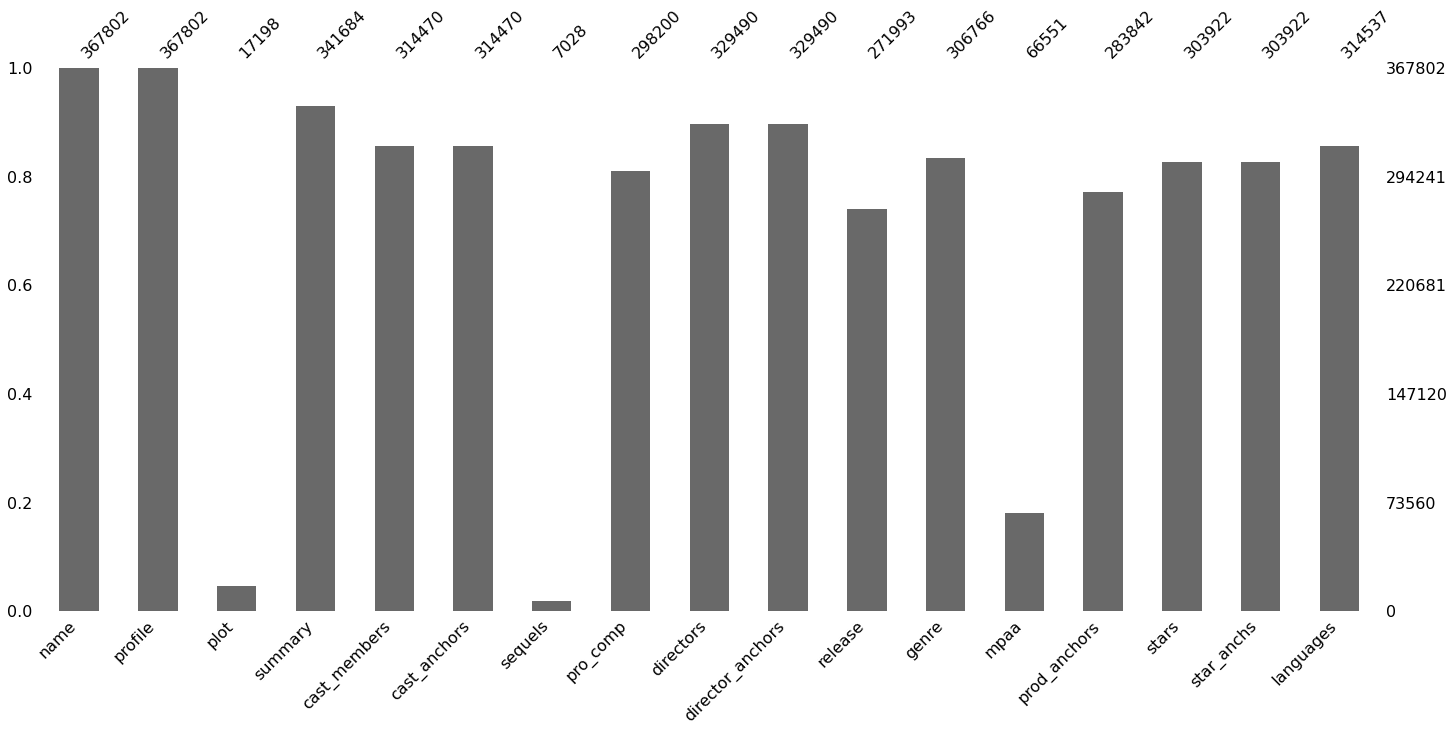

In [34]:
msno.bar(df)

In [21]:
drop_columns=['budget','box_office', 'int_office', 'runtime','director_credits','cinematographer','cin_anch','musician','musician_anchor', 'prod_designer', 'prod_designer_anchor','costume_designer','costume_designer_anchor','sequel','screen_writers','screen_anchors','screen_credits','spec_eff','sound_mix','producers','prod_credits','cast_count','comp_count','version_count','references_count']
df=df.drop(columns=drop_columns)

In [22]:
df.head()

,name,profile,plot,summary,cast_members,cast_anchors,sequels,pro_comp,directors,director_anchors,release,genre,mpaa,prod_anchors,stars,star_anchs,languages
0,Star Wars: Episode VII - The Force Awakens,/title/tt2488496/,"Luke Skywalker has vanished. In his absence, t...","Three decades after the Empire's defeat, a new...","['Harrison Ford', 'Carrie Fisher', 'Daisy Ridl...","['/name/nm0000148/', '/name/nm0000402/', '/nam...","['Star Wars: Episode IV - A New Hope', 'Star W...","['Lucasfilm', 'Bad Robot', 'Truenorth Producti...",['J.J. Abrams'],['/name/nm0009190/'],18 December 2015,"['Action', 'Adventure', 'Sci-Fi']",PG-13,"['/name/nm0009190/', '/name/nm0027297/', '/nam...","['Daisy Ridley', 'John Boyega', 'Oscar Isaac']","['/name/nm5397459/', '/name/nm3915784/', '/nam...",English
1,Avengers: Endgame,/title/tt4154796/,"In the opening, Clint Barton is teaching his d...",After the devastating events of Avengers: Infi...,"['Robert Downey Jr.', 'Mark Ruffalo', 'Scarlet...","['/name/nm0000375/', '/name/nm0749263/', '/nam...","['The Avengers', 'Avengers: Age of Ultron', 'A...",['Marvel Studios'],"['Anthony Russo', 'Joe Russo']","['/name/nm0751577/', '/name/nm0751648/']",26 April 2019,"['Action', 'Adventure', 'Drama']",PG-13,"['/name/nm0022285/', '/name/nm0068416/', '/nam...","['Robert Downey Jr.', 'Chris Evans', 'Mark Ruf...","['/name/nm0000375/', '/name/nm0262635/', '/nam...",English|Japanese|Xhosa|German
2,Avatar,/title/tt0499549/,The story opens with a sweeping shot high acro...,A paraplegic Marine dispatched to the moon Pan...,"['Sam Worthington', 'Sigourney Weaver', 'Miche...","['/name/nm0941777/', '/name/nm0000244/', '/nam...",NaN,"['Twentieth Century Fox', 'Dune Entertainment'...",['James Cameron'],['/name/nm0000116/'],18 December 2009,"['Action', 'Adventure', 'Fantasy']",PG-13,"['/name/nm0107868/', '/name/nm0000116/', '/nam...","['Sam Worthington', 'Zoe Saldana', 'Sigourney ...","['/name/nm0941777/', '/name/nm0757855/', '/nam...",English|Spanish
3,Black Panther,/title/tt1825683/,A voice from a young boy asks to tell him a st...,"T'Challa, heir to the hidden but advanced king...","['Chadwick Boseman', ""Lupita Nyong'o"", 'Martin...","['/name/nm1569276/', '/name/nm2143282/', '/nam...",NaN,"['Marvel Studios', 'Walt Disney Pictures']",['Ryan Coogler'],['/name/nm3363032/'],16 February 2018,"['Action', 'Adventure', 'Sci-Fi']",PG-13,"['/name/nm0022285/', '/name/nm0155942/', '/nam...","['Chadwick Boseman', 'Michael B. Jordan', ""Lup...","['/name/nm1569276/', '/name/nm0430107/', '/nam...",English|Swahili|Nama|Xhosa|Korean
4,Avengers: Infinity War,/title/tt4154756/,SPOILER: Thanos and his Children - Proxima Mid...,The Avengers and their allies must be willing ...,"['Robert Downey Jr.', 'Mark Ruffalo', 'Scarlet...","['/name/nm0000375/', '/name/nm0749263/', '/nam...","['The Avengers', 'Avengers: Age of Ultron']","['Marvel Studios', 'Jason Roberts Productions'...","['Anthony Russo', 'Joe Russo']","['/name/nm0751577/', '/name/nm0751648/']",27 April 2018,"['Action', 'Adventure', 'Sci-Fi']",PG-13,"['/name/nm0022285/', '/name/nm0068416/', '/nam...","['Robert Downey Jr.', 'Chris Hemsworth', 'Mark...","['/name/nm0000375/', '/name/nm1165110/', '/nam...",English


In [ ]:
import seaborn as sns
df['summary_len']

In [56]:
Counter(df['summary'].dropna()).most_common(30)

[('Add a Plot\xa0»', 146808),
 ('Plot unknown.', 110),
 ('Plot kept under wraps.', 18),
 ('The plot is unknown at this time.', 15),
 ("Hamlet suspects his uncle has murdered his father to claim the throne of Denmark and the hand of Hamlet's mother, but the prince cannot decide whether or not he should take vengeance.",
  13),
 ('Macbeth, the Thane of Glamis, receives a prophecy from a trio of witches that one day he will become King of Scotland. Consumed by ambition and spurred to action by his wife, Macbeth murders his king and takes the throne for himself.',
  11),
 ('The Moorish general Othello is manipulated into thinking that his new wife Desdemona has been carrying on an affair with his lieutenant Michael Cassio when in reality it is all part of the scheme of a bitter ensign named Iago.',
  9),
 ('Two teenagers fall in love, but their feuding families and fate itself cause the relationship to end in tragedy.',
  9),
 ('The plot is unknown.', 9),
 ('An orphan named Oliver Twist me

In [46]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re
import random
import chart_studio.graph_objs as go
import chart_studio.plotly as py
import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='solar')

In [53]:
def get_top_n_words(corpus, n=None):
  vec = CountVectorizer().fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0) 
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]
common_words = get_top_n_words(df['summary'].dropna(), 20)
df1 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
df1.head(20)

,desc,count
0,the,274307
1,to,162936
2,of,160812
3,and,149960
4,plot,148316
5,add,146886
6,in,122313
7,is,91328
8,his,88662
9,see,73759


In [55]:
def get_top_n_words(corpus, n=None):
  vec = CountVectorizer(stop_words='english').fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0) 
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]
common_words = get_top_n_words(df['summary'].dropna(), 20)
df2 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
df2.head(20)

,desc,count
0,plot,148316
1,add,146886
2,summary,70821
3,young,24506
4,life,20672
5,man,19702
6,love,17078
7,story,14746
8,woman,13348
9,family,12738


In [10]:
'''
  CONVERT COLUMNS TO LISTS
'''
import ast

def cleanColumn(row):
  try:
    if type(row)==str:
      values = ast.literal_eval(row)
      if type(values)!=dict:
        cleaned_values=[]
        for val in values:
          val = val.replace(",", "").strip()
          cleaned_values.append(val)
        return cleaned_values
      else:
        return values
    else:
      return np.nan
  except:
    return np.nan

columns = ['sequel',
'cast_members',
'cast_anchors',
'directors',
'director_anchors',
'director_credits',
'pro_comp',
'spec_eff',
'sound_mix',
'stars',
'star_anchs',
'screen_writers',
'screen_anchors',
'screen_credits',
'producers',
'prod_anchors',
'prod_credits',
'genre',
'comp_count',
'cast_count']

for value in tqdm(columns):
  tqdm.pandas(desc="Creating Datetime")
  df[value] = df[value].apply(cleanColumn)

df['cast'] = df['cast_members']
df = df.drop(columns=['cast_members', 'sequels'])

c:\users\brian\anaconda3\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [4]:
'''
  CONVERT DATE INTO ISO FORMAT
'''
def createDates(row):
  if type(row)==str:
    return dateutil.parser.parse(row).strftime('%Y-%m-%d')
  else:
    return np.nan

def createDateTime(row):
  row = row.split("-")
  row = datetime.datetime(int(row[0]), int(row[1]), int(row[2]))
  return row

tqdm.pandas(desc="Creating Date")
df['date'] = df['release'].progress_apply(createDates)
df = df.dropna(subset=['date'])
df = df.reset_index(drop=True)

tqdm.pandas(desc="Creating Datetime")
df['datetime'] = df['date'].progress_apply(createDateTime)
tqdm.pandas(desc="Creating Year Column")
df['year'] = df['datetime'].progress_apply(lambda x: x.year)
tqdm.pandas(desc="Creating Month Column")
df['month'] = df['datetime'].progress_apply(lambda x: x.month)

In [7]:
def mainProd(row):
  try:
    return row[0]
  except:
    return np.nan
tqdm.pandas(desc="Production Company")
df['main_prod'] = df['pro_comp'].progress_apply(mainProd)